## https://www.kaggle.com/rafay12/cancer-dna-patients-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv('DNA_Dataset_cancer_patient.csv')
df.head()

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,Class
0,2.325242,3.247092,8.174007,10.065053,7.487446,0.000000,0.0,0.000000,2.759582,0.0,...,0.0,0.000000,0.566572,2.759582,7.149066,9.382985,11.393793,11.642183,0.000000,1
1,3.446190,3.620962,7.171917,9.796559,8.175245,1.972509,0.0,1.972509,2.218967,0.0,...,0.0,0.000000,0.000000,0.000000,7.292138,10.073097,8.763408,11.354894,0.791689,1
2,2.554196,1.296134,8.770277,10.462901,8.013993,0.000000,0.0,0.736562,3.543446,0.0,...,0.0,0.414785,0.000000,6.290605,6.865300,9.681449,8.968667,11.782720,0.414785,1
3,3.667699,3.083179,7.997292,9.516886,7.925424,0.732486,0.0,0.000000,3.762157,0.0,...,0.0,0.000000,0.000000,0.000000,7.258726,10.100321,9.391772,11.355979,0.000000,1
4,3.821935,3.717605,7.593100,10.205964,7.613185,0.000000,0.0,0.000000,1.982364,0.0,...,0.0,0.000000,0.000000,2.261441,8.054105,10.471025,8.439449,11.730143,0.000000,1


In [3]:
df.isnull().sum()

gene_1     0
gene_2     0
gene_3     0
gene_4     0
gene_6     0
gene_7     0
gene_10    0
gene_11    0
gene_12    0
gene_13    0
gene_14    0
gene_17    0
gene_18    0
gene_19    0
gene_20    0
gene_21    0
gene_22    0
gene_23    0
gene_24    0
gene_25    0
gene_26    0
gene_27    0
gene_28    0
gene_29    0
gene_30    0
gene_31    0
gene_32    0
gene_33    0
gene_34    0
gene_35    0
gene_36    0
gene_37    0
gene_38    0
gene_39    0
gene_40    0
gene_41    0
gene_42    0
gene_43    0
gene_44    0
gene_45    0
gene_46    0
gene_47    0
gene_48    0
gene_49    0
Class      0
dtype: int64

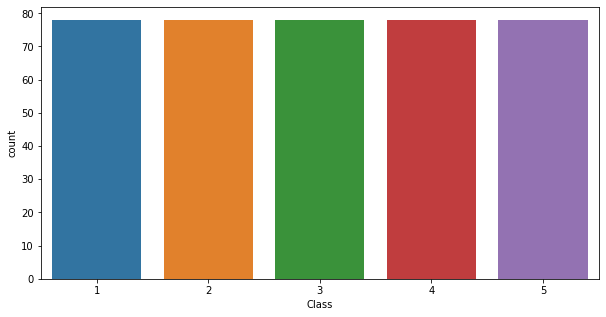

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df.Class,data=df)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report

In [27]:
names=['kneighbor','svm_linear','gaussian_classifier','random_forest','naive_bayes','neural']
classifiers=[KNeighborsClassifier(n_neighbors=4),SVC(kernel='linear'),GaussianProcessClassifier(),RandomForestClassifier(n_estimators=4),
            GaussianNB(),MLPClassifier()]
models=zip(names,classifiers)

In [28]:
x=df.iloc[:,:-1].values
y=df['Class'].values

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
for name,model in models:
    kfold=KFold(n_splits=5)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(name)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

kneighbor
0.9102564102564102
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        21
           2       0.89      1.00      0.94        16
           3       1.00      0.95      0.97        19
           4       0.89      0.67      0.76        12
           5       0.73      0.80      0.76        10

    accuracy                           0.91        78
   macro avg       0.89      0.88      0.88        78
weighted avg       0.91      0.91      0.91        78



svm_linear
0.9487179487179487
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        21
           2       0.94      1.00      0.97        16
           3       1.00      0.95      0.97        19
           4       0.85      0.92      0.88        12
           5       1.00      0.90      0.95        10

    accuracy                           0.95        78
   macro avg       0.95      0.94      0.94        78
weighted avg    

D:\Anaconda3\envs\Deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
